<a href="https://colab.research.google.com/github/CaptainAshis/Time_Series_Python-SQL/blob/master/TimeSeries4_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from pmdarima import auto_arima

In [0]:
 %cd drive/'My Drive'/amex/

/content/drive/My Drive/amex


In [0]:
df=pd.read_csv('co2_mm_mlo.csv')

In [0]:
df.head()

,Decimal Date,Average,Interpolated,Year,Month
Date,,,,,
1958-03-01,1958.208,315.71,315.71,1958,3
1958-04-01,1958.292,317.45,317.45,1958,4
1958-05-01,1958.375,317.50,317.50,1958,5
1958-06-01,1958.458,-99.99,317.10,1958,6
1958-07-01,1958.542,315.86,315.86,1958,7


In [0]:
 df.drop('Trend',inplace=True,axis=1)
df.drop('Number of Days',inplace=True,axis=1)

In [0]:
df['Date']=pd.to_datetime(df['Date'])

In [0]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [0]:
df=df.set_index('Date')
df.index.freq='MS'

The average column is missing some values so we go with interpolated column.

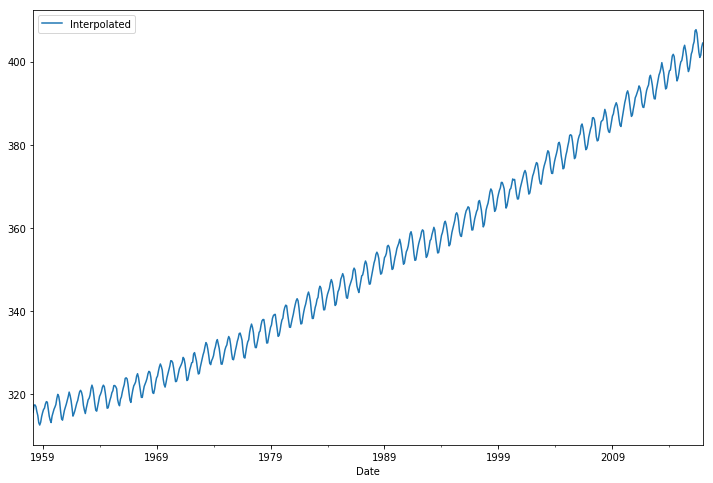

In [0]:
df['Interpolated'].plot(figsize=(12,8),legend=True);
# There is some seasonality that we see through naked eyes.

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX


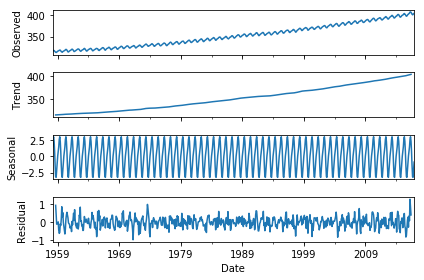

In [0]:
result=seasonal_decompose(df['Interpolated'],model='add')
result.plot();
# Check out the huge seasonality here.

In [0]:
result.seasonal.head(14)

Date
1958-03-01    1.446860
1958-04-01    2.582305
1958-05-01    3.014151
1958-06-01    2.308110
1958-07-01    0.709879
1958-08-01   -1.457197
1958-09-01   -3.134225
1958-10-01   -3.242882
1958-11-01   -2.067314
1958-12-01   -0.885181
1959-01-01    0.040222
1959-02-01    0.685272
1959-03-01    1.446860
1959-04-01    2.582305
Freq: MS, Name: Interpolated, dtype: float64

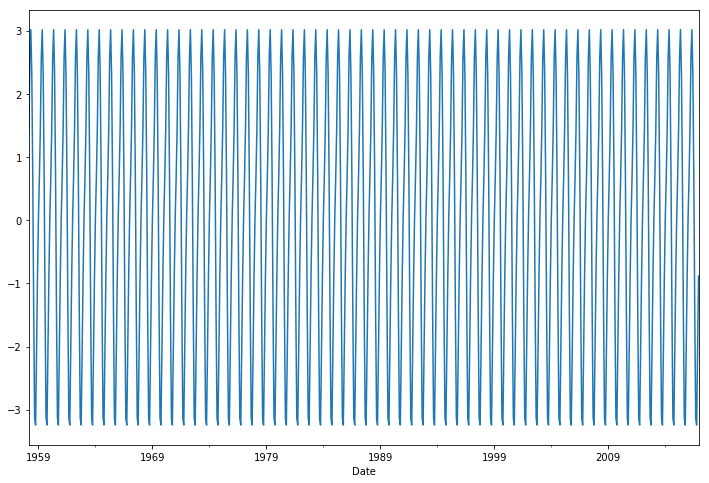

In [0]:
result.seasonal.plot(figsize=(12,8))

In [0]:
 auto_arima(df['Interpolated'],seasonal=True,m=12).summary()
  #   This is gonna verify ARIMA order and seasonal order also(p,d,q and P,D,Q). Also the warnings can be removed , check stackoverlow

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  706
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -204.658
Date:                            Thu, 27 Jun 2019   AIC                            419.317
Time:                                    03:20:13   BIC                            442.108
Sample:                                         0   HQIC                           428.124
                                            - 706                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.949e-05      0.000      0.393      0.695      -0.000       0.000
ma.L1         -0.3688      0.035    -10.644      0.000      -0.437      -0.301
ar.S.L12       0.9996      0.000   2911.202      0.000       0.999       1.000
ma.S.L12      -0.8627      0.024    -36.611      0.000      -0.909      -0.817
sigma2         0.0969      0.005     19.975      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       50.54   Jarque-Bera (JB):                 3.74
Prob(Q):                              0.12   Prob(JB):                         0.15
Heteroskedasticity (H):               1.17   Skew:                            -0.03
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
len(df),len(df)-12

(706, 694)

In [0]:
train=df.iloc[:694]
test=df.iloc[694:]

In [0]:
model=SARIMAX(train['Interpolated'],order=(0, 1, 1),seasonal_order=(1, 0, 1, 12))
result=model.fit()
result.summary()
# Check out the minimum AIC :- AIC 	384.076

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       Interpolated   No. Observations:                  694
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -188.038
Date:                            Thu, 27 Jun 2019   AIC                            384.076
Time:                                    03:25:04   BIC                            402.240
Sample:                                03-01-1958   HQIC                           391.101
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3702      0.034    -10.883      0.000      -0.437      -0.304
ar.S.L12       0.9997      0.000   3545.474      0.000       0.999       1.000
ma.S.L12      -0.8718      0.023    -38.566      0.000      -0.916      -0.827
sigma2         0.0928      0.005     18.753      0.000       0.083       0.102
===================================================================================
Ljung-Box (Q):                       50.02   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.13   Prob(JB):                         0.46
Heteroskedasticity (H):               1.05   Skew:                            -0.10
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
start=len(train)
end=len(train)+len(test)-1
predictions=result.predict(start,end,typ='levels').rename('SARIMA Predictions')

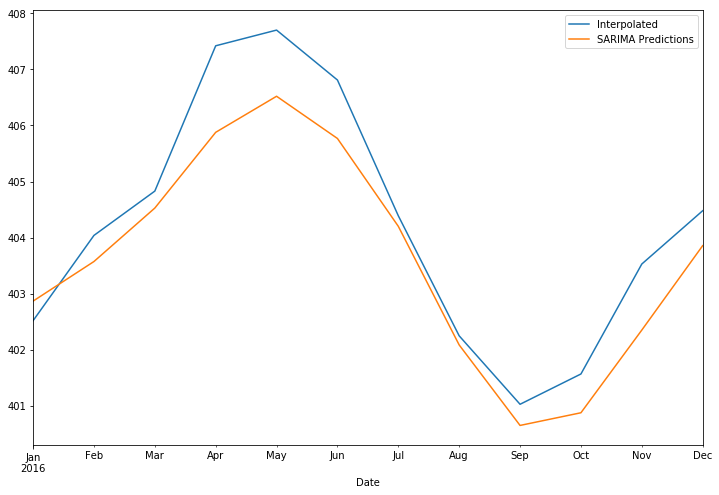

In [0]:
test['Interpolated'].plot(figsize=(12,8),legend=True);
predictions.plot(legend=True);

In [0]:
from statsmodels.tools.eval_measures import rmse
error=rmse(test['Interpolated'],predictions)
error

0.8032031418480089

In [0]:
test['Interpolated'].mean(),predictions.mean()

(404.21416666666664, 403.59733561477515)

In [0]:
# Retrain the whole model and forecast into the unknown future. There is  no way to understand how good are the forecast as its unknown,

In [0]:
model=SARIMAX(df['Interpolated'],order=(0, 1, 1),seasonal_order=(1, 0, 1, 12))
results=model.fit()
fcast=results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA forecast')

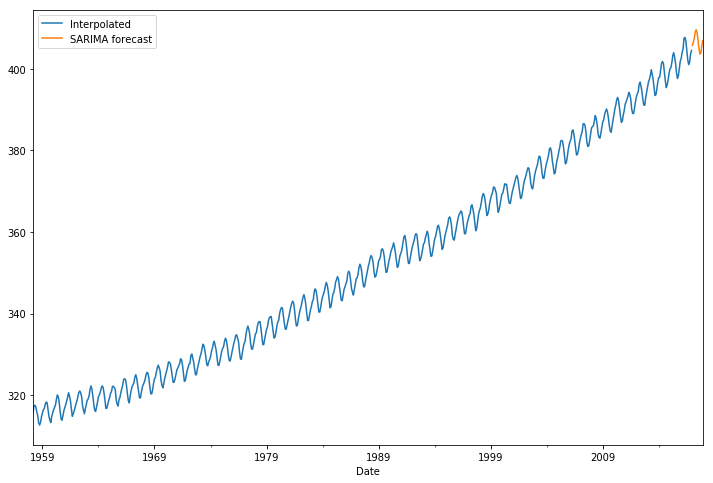

In [0]:
df['Interpolated'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)
# As we can see there is a seasonality and an upward trend going on in the forecast